# Assignment 2: Medical Cost Prediction


I shall be implementing the Linear Regression algorithm to predict medical insurance costs using demographic and health-related features.

**Dataset:**  
- `Medical Price Dataset.csv`: Dataset contains input features like age, BMI, smoker status, etc., along with the target variable that is medical insurance cost.


In [40]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Step 1: Loading Dataset

In [41]:
# Load the dataset
data = pd.read_csv('/content/Medical Price Dataset.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Step 2: Data Preprocessing

1. **Check for missing values**: We first check if there are any missing values in our dataset that need to be handled.

2. **Convert categorical variables**:
   - Convert 'sex' to numerical (0 for female, 1 for male)
   - Convert 'smoker' to numerical (0 for no, 1 for yes)
   - Use one-hot encoding for 'region' column

3. **Separate features and target**:
   - X contains all features except 'charges'
   - y contains only the 'charges' (our target variable)

4. **Visualize target distribution**: We plot a histogram of the charges to understand its distribution.

In [42]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [43]:
# Convert categorical variables to numerical
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data = pd.get_dummies(data, columns=['region'], drop_first=True)

In [44]:
# Separate features and target variable
X = data.drop('charges', axis=1)
y = data['charges']

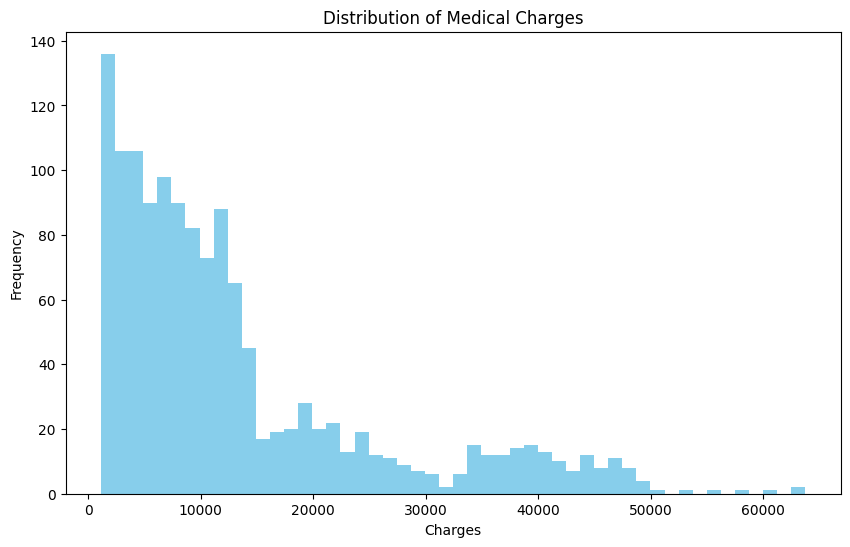

In [45]:
# Visualize the distribution of charges
plt.figure(figsize=(10, 6))
plt.hist(y, bins=50, color='skyblue')
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

### Step 3: Implement Linear Regression from Scratch

We create a LinearRegression class that implements:
- **fit()**: Uses gradient descent to learn the weights and bias
- **predict()**: Makes predictions using the learned parameters
- **mean_squared_error()**: Calculates MSE for evaluation
- **r2_score()**: Calculates R-squared for evaluation

This is implemented from scratch using only NumPy operations.

In [46]:
class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y, learning_rate=0.01, epochs=1000):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(epochs):
            # Predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

    def r2_score(self, y_true, y_pred):
        ss_res = np.sum((y_true - y_pred)**2)
        ss_tot = np.sum((y_true - np.mean(y_true))**2)
        return 1 - (ss_res / ss_tot)

### Step 4: Train-Test Split and Model Training

1. **train_test_split()**: Custom implementation to split data into training (80%) and testing (20%) sets.

2. **Normalization**: We normalize the features to have mean=0 and std=1 to help gradient descent converge faster.

3. **Model Training**: We create an instance of our LinearRegression class and train it on the training data.

In [47]:
# Split data into train and test sets
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_idx = int(X.shape[0] * (1 - test_size))
    X_train, X_test = X.iloc[indices[:split_idx]], X.iloc[indices[split_idx:]]
    y_train, y_test = y.iloc[indices[:split_idx]], y.iloc[indices[split_idx:]]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Normalize the data
def normalize(X):
    return (X - X.mean()) / X.std()

X_train = normalize(X_train)
X_test = normalize(X_test)

In [49]:
# Train the model
model = LinearRegression()
model.fit(X_train.values, y_train.values, learning_rate=0.1, epochs=1000)

### Step 5: Model Evaluation

We evaluate our model using:
1. **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
2. **R-squared Score**: Measures how well the model explains the variance in the data.

We also visualize the predictions vs actual values to see how well our model performs.

In [50]:
# Make predictions
y_pred = model.predict(X_test.values)

# Calculate metrics
mse = model.mean_squared_error(y_test, y_pred)
r2 = model.r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 38441141.13088447
R-squared Score: 0.7537492388516452


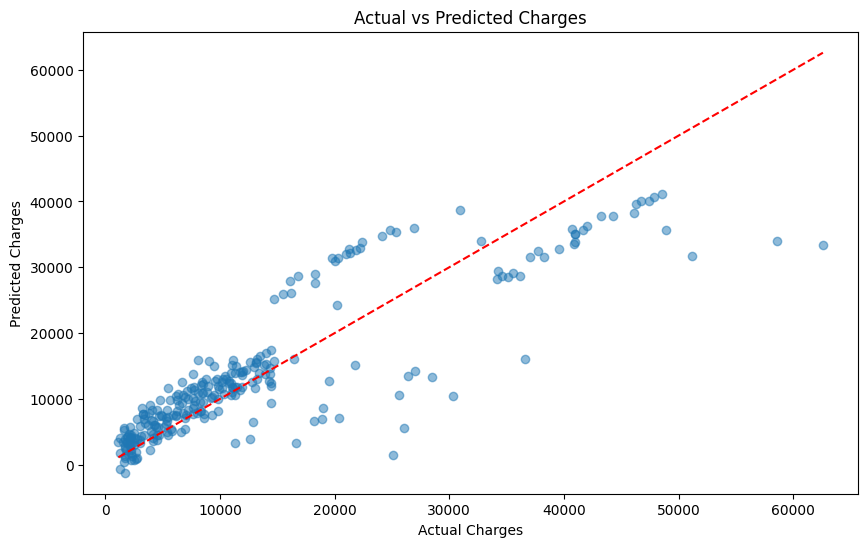

R-squared Score: 0.7537492388516452


In [51]:
# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

# Print R-squared score
print(f"R-squared Score: {r2}")

### Step 6: Feature Importance

We examine the learned weights to understand which features are most important in predicting medical charges.

The weights show how much each feature contributes to the prediction (positive or negative).

In [52]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Weight': model.weights
}).sort_values('Weight', ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
            Feature       Weight
4            smoker  9580.849450
0               age  3644.035636
2               bmi  2000.634228
3          children   574.711235
1               sex   -20.926714
5  region_northwest  -150.682272
7  region_southwest  -402.409325
6  region_southeast  -522.595012


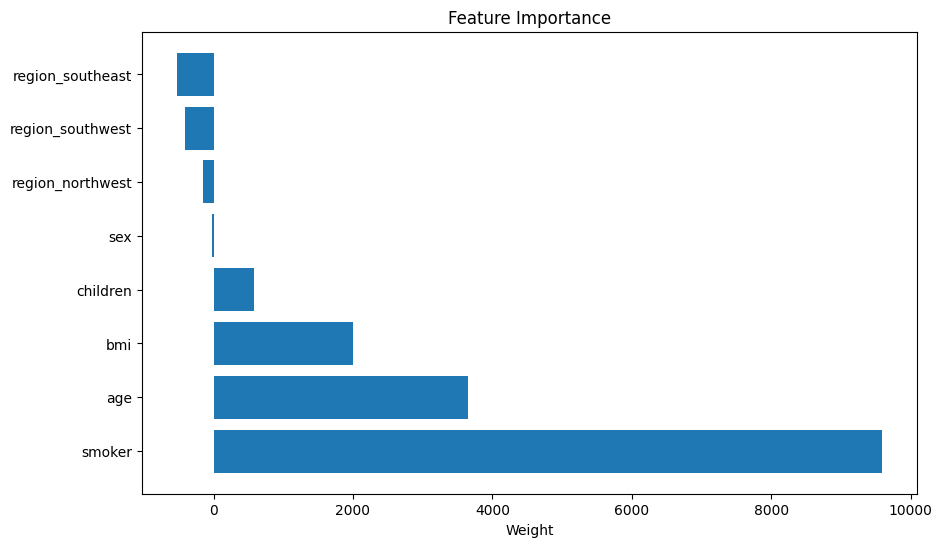

In [53]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Weight'])
plt.title('Feature Importance')
plt.xlabel('Weight')
plt.show()

### Step 7: Github Link

https://github.com/ShivanshSrivastava136/FSM-Assignment-2